In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Gegeben ist das Randwertproblem

\begin{eqnarray}
    -u''(x) + u(x) = 1 & \qquad \text{für} \; x \in (0,1)\\
    u(0) = 0\\
    u'(1) = 1
\end{eqnarray}

In [2]:
x0 = 0
xend = 1
u0 = 0
udot_end = 1
f = 1

In [3]:
def mat_f(i, j):
    i += 1
    j += 1
    return i * j / (i+j-1) + 1 / (i+j+1)

In [4]:
def p_FEM(p, xi):
    base_matrix = np.fromfunction(np.vectorize(mat_f), (p, p))

    rhs_list = [1/(i+1) + udot_end for i in range(1, p+1)]
    rhs = np.array(rhs_list)

    up_coeff = np.linalg.solve(base_matrix, rhs)
    up_coeff = np.hstack((np.array([u0]), up_coeff))
    
    up = 0
    for j, coeff in enumerate(up_coeff):
        up += coeff * xi**j
        
    return up

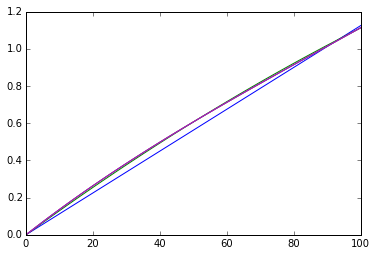

In [5]:
h = 0.01
xi = np.arange(0, 1+h, h)
for p in range(0,5):
    plt.plot(p_FEM(2**p, xi))
    
plt.show()